### 선형회귀 (Linear regression) ~ fitting

regress : 원래자리로 돌아가는 것

ex) 부모의 키가 아주 큰(작은) 경우 자녀의 키는 다시 평균으로 돌아가려는 경향이 있음(평균으로의 회귀 경향)

데이터 셋에서 데이터를 피팅하는 과정은
data = x, y
y= ax+b
fitting하여 a,b를 찾아내는 과정이다.

ML에서 data는 x - features, y - labels, a,b - parameters
y = ax+b - model, fitting하여 a,b를 찾아내는 과정을 learning, training이라고 칭한다.
즉,
x -> features
y -> labels
a,b -> parameters
y = ax+b -> model
fitting -> learning, training

supervised learning
1. regression
2. classification
- 두 문제는 본질적으로 아주 비슷한 문제, regression을 통해서 두 부류로 나눠지게 되면, classification

최소제곱법 (14:38)
14:45~15:03까지 - y가 다변수 함수일 때, 각 변수마다 가중치를 w, 각 변수를 x^i이라고 할 때 어떻게 최소제곱이 될 때를 구하는지에 관한 내용(다시 보기)



In [1]:
import matplotlib.pyplot as plt
import numpy as np

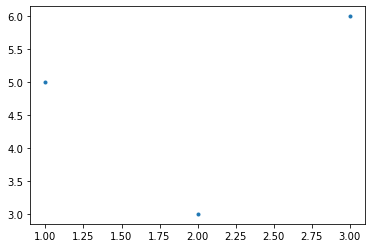

In [3]:
plt.plot([1,2,3],[5,3,6],'.')

##### (1,5), (2,3), (3,6)점 찍어줌

## Regression
- scikit learn

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
data = np.array([[1,2,3,4],[5.8,2.5,1.4,-0.4]])
x = [[i] for i in data[0]]
y = [[i] for i in data[1]]

In [7]:
x


[[1.0], [2.0], [3.0], [4.0]]

In [8]:
y

[[5.8], [2.5], [1.4], [-0.4]]

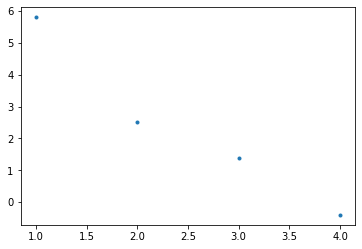

In [20]:
plt.plot(x,y,'.')

##### scikit learn을 통하면 한줄이면 fitting가능

In [29]:
reg = LinearRegression() # 변수 지정
reg.fit(x,y)# x,y를 가지고 fitting해라

LinearRegression()

In [21]:
reg.coef_, reg.intercept_ #기울기와 y절편 결과값 구하기

(array([[-1.97]]), array([7.25]))

In [17]:
x_new=[[5]] # x_new에 5를 넣는다
reg.predict(x_new) # x_new에 5를 넣었을 때 예측되는 값은 얼마인가?

array([[-2.6]])

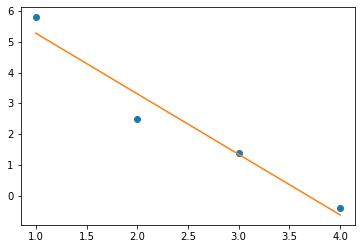

In [25]:
plt.plot(x,y,'o')
plt.plot(x,reg.predict(x))

### Polynomial regression 

In [77]:
N = 50
x = np.linspace(-2,1,50)  # 등간격으로 -2~1까지 50개 만들어라
y = 0.8*x**2 + x + np.random.rand(N)

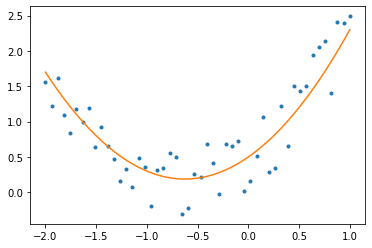

In [79]:
plt.plot(x,y,'.')
plt.plot(x,0.8*x**2+x+0.5)

In [98]:
X = [[i] for i in x]
Y = [[i] for i in y]  # 성분들을 전부 [[],[].[]]형태로 바꿔주기

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) #2차식이라고 지정
X_poly2 = poly.fit_transform(X)

In [100]:
reg2 = LinearRegression()
reg2.fit(X_poly2,Y)
reg2.intercept_, reg2.coef_ # 1차항, 제곱항 결과값 출력

(array([0.54589441]), array([[1.1386213 , 0.83738265]]))

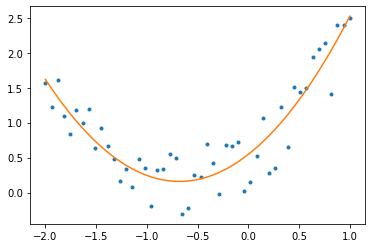

In [101]:
plt.plot(X,Y,'.')
plt.plot(X,reg2.predict(X_poly2))

##### 40차식이라면 / 1차식이라면 ??? 

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=40, include_bias=False) #40차식이라고 지정
X_poly40 = poly.fit_transform(X)

In [103]:
reg40 = LinearRegression()
reg40.fit(X_poly40,Y)

LinearRegression()

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False) #1차식이라고 지정
X_poly1 = poly.fit_transform(X)

In [105]:
reg1 = LinearRegression()
reg1.fit(X_poly1,Y)

LinearRegression()

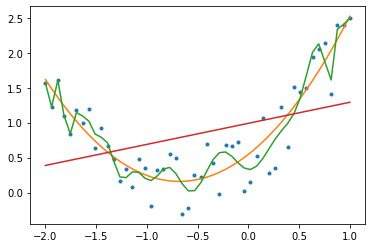

In [106]:
plt.plot(X,Y,'.')
plt.plot(X,reg2.predict(X_poly2))
plt.plot(X,reg40.predict(X_poly40))
plt.plot(X,reg1.predict(X_poly1))

## Overfitting(과적합, 초록색 실선) / Underfitting(과소적합, 붉은색 실선)